In [1]:
# Import packages and supress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 25)

In [2]:
#read data
boombike=pd.read_csv("day.csv")
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Data Understanding


In [3]:
#data structure
boombike.shape

(730, 16)

In [4]:
#stats summary of columns
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#datatype 
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
#mising value
boombike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# check unique value
boombike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [8]:
# drop unnecessary columns-instant,dteday,casual,registered
boombike=boombike.drop(['instant','dteday','casual', 'registered'], axis=1)
boombike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Column datatype:
    1. Binary- yr,holiday,workday
    2.categorical-season,mnth,weekday,weathersit
    3.continous- temp,atemp,hum,windspeed
Output column-cnt

In [9]:
# converting categorical variable from numberical to category

boombike['season']=boombike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boombike['mnth']=boombike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boombike['weathersit']=boombike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
boombike['weekday']=boombike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

In [10]:
#datatype 
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.5+ KB


### Numerical Variable

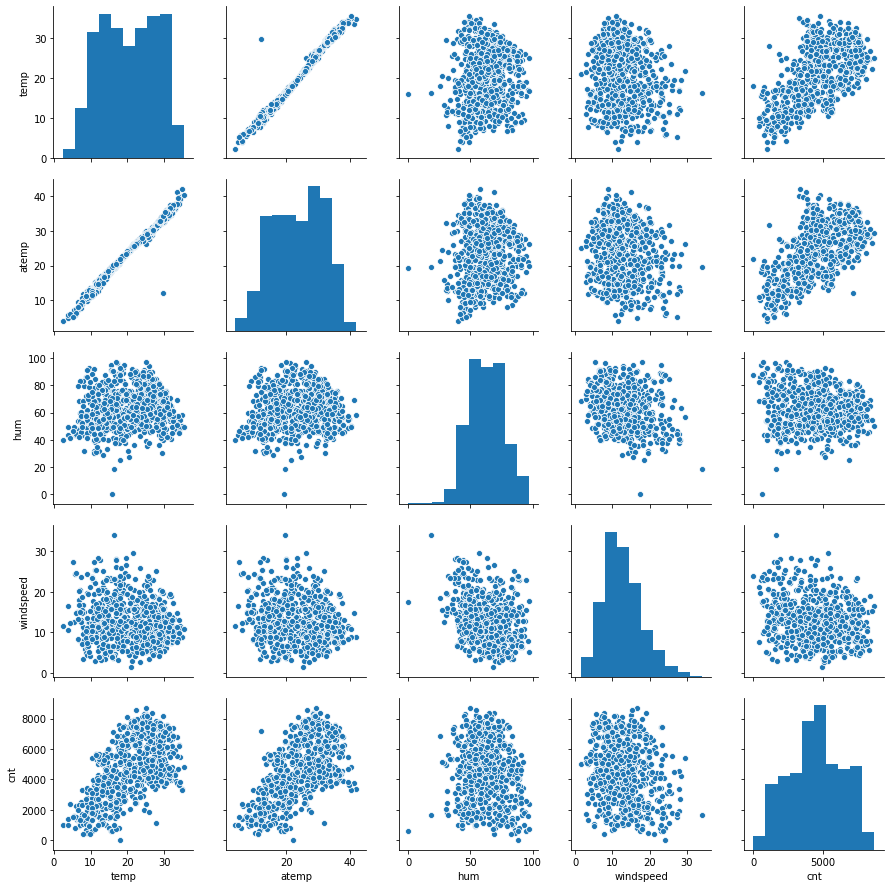

In [11]:
#pair plot
sns.pairplot(boombike, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

temp and atemp seems highly correlated with total bike demand

### Categorical variable

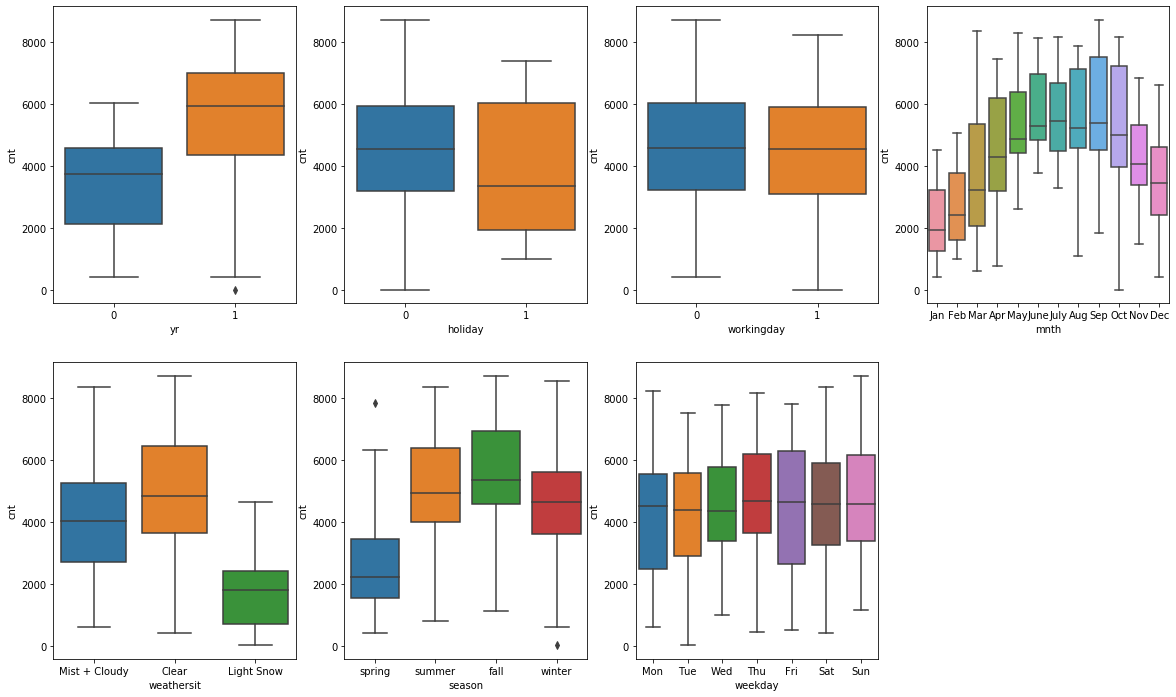

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = boombike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombike)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = boombike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombike)
plt.show()

Conclusions:
    1.More bike rentend in 2019 than 2018
    2.Nearly same on weekdays and weekends
    3.Peek season include augest to october and jan having least sales
    4.More rentals in Clear, Few clouds, Partly cloudy weather
    5.More sales in fall
    6.Thurday ,Friday more bike rentals

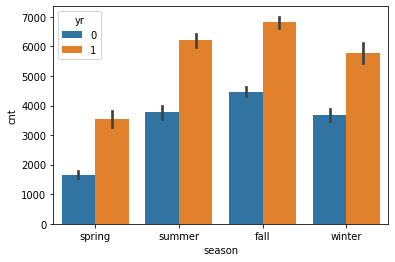

In [13]:
#season 
sns.barplot('season','cnt',hue='yr',data=boombike)
plt.show()


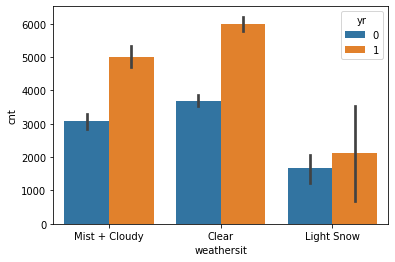

In [14]:
#weathersit 
sns.barplot('weathersit','cnt',hue='yr',data=boombike)
plt.show()

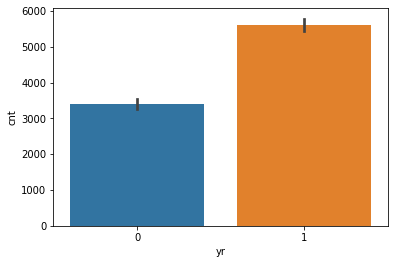

In [15]:
#Year 
sns.barplot('yr','cnt',data=boombike)
plt.show()

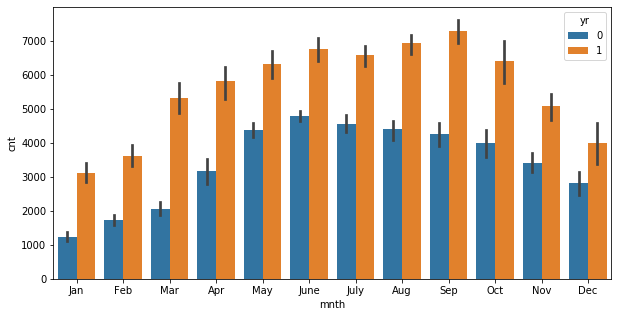

In [16]:
#month 
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=boombike)
plt.show()

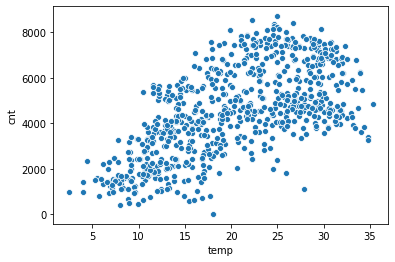

In [17]:
#temp 
sns.scatterplot('temp','cnt',data=boombike)
plt.show()

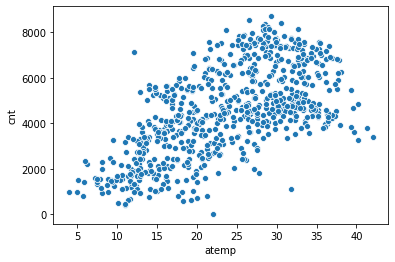

In [18]:
#atemp 
sns.scatterplot('atemp','cnt',data=boombike)
plt.show()

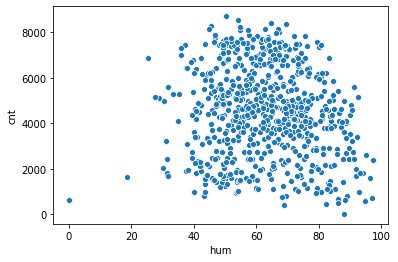

In [19]:
#humidity 
sns.scatterplot('hum','cnt',data=boombike)
plt.show()

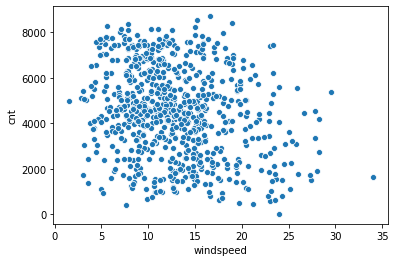

In [20]:
#windspeed 
sns.scatterplot('windspeed','cnt',data=boombike)
plt.show()

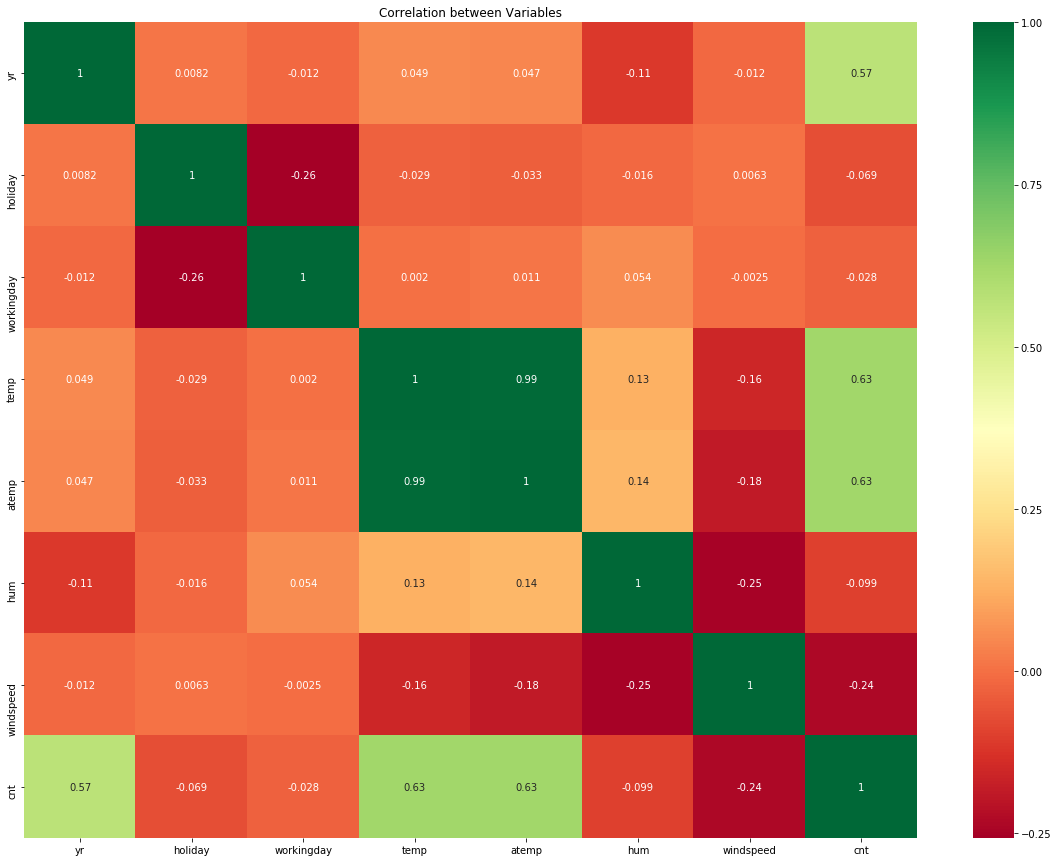

In [21]:
#Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(boombike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

# Data Prep

#### Dummy variables

In [22]:
#dummy variable for catgorical variables 
months=pd.get_dummies(boombike.mnth,drop_first=True)
weekdays=pd.get_dummies(boombike.weekday,drop_first=True)
weather_sit=pd.get_dummies(boombike.weathersit,drop_first=True)
seasons=pd.get_dummies(boombike.season,drop_first=True)
boombike=pd.concat([months,weekdays,weather_sit,seasons,boombike],axis=1)
boombike.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,...,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,...,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,...,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,...,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,...,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,...,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
#drop catgorical columns
boombike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boombike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
boombike.shape

(730, 30)

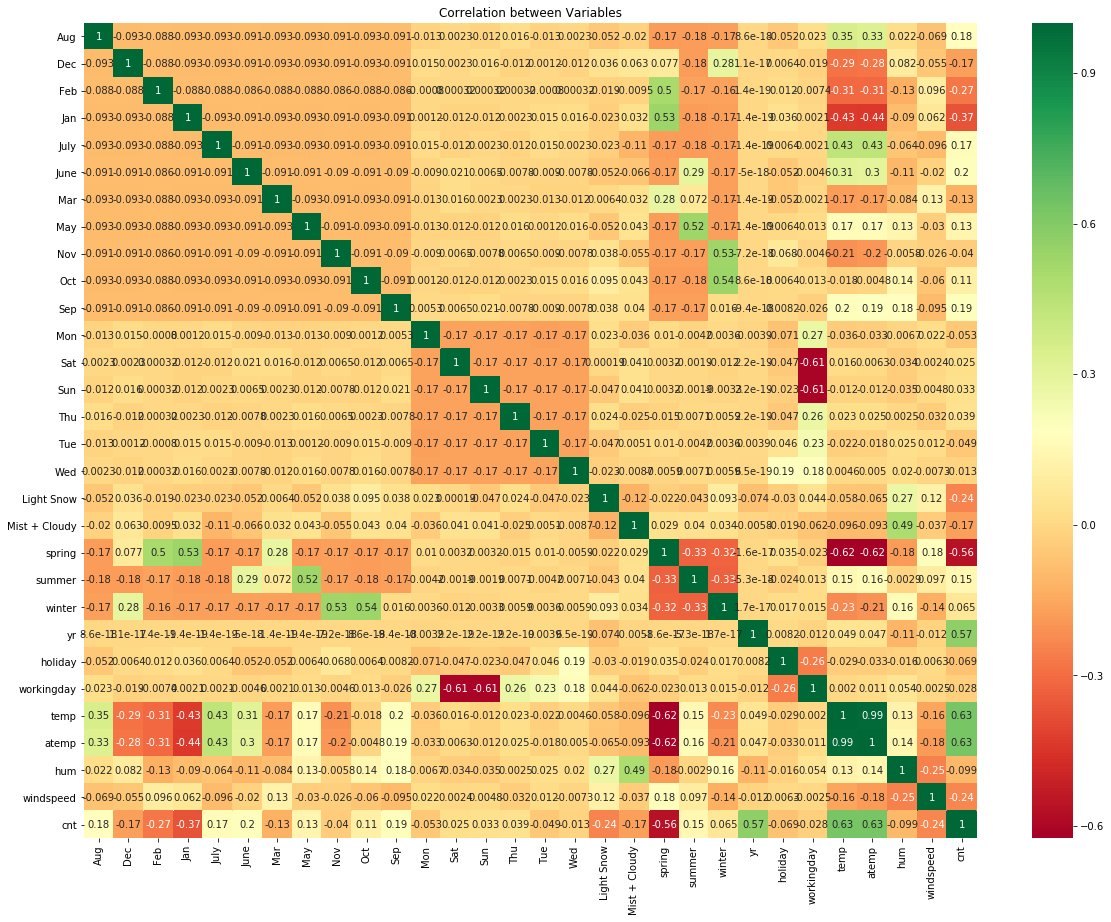

In [25]:
#Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(boombike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

#### spliting data 


In [26]:
np.random.seed(0)
boombike_train, boombike_test = train_test_split(boombike, train_size = 0.7, random_state = 100)

In [27]:
print(boombike_train.shape)
print(boombike_test.shape)

(510, 30)
(220, 30)


## Scaling data 

In [28]:
#Min-MAx Scaling 
scaler = MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']
boombike_train[num_vars] = scaler.fit_transform(boombike_train[num_vars])
boombike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


## Multicollinearity


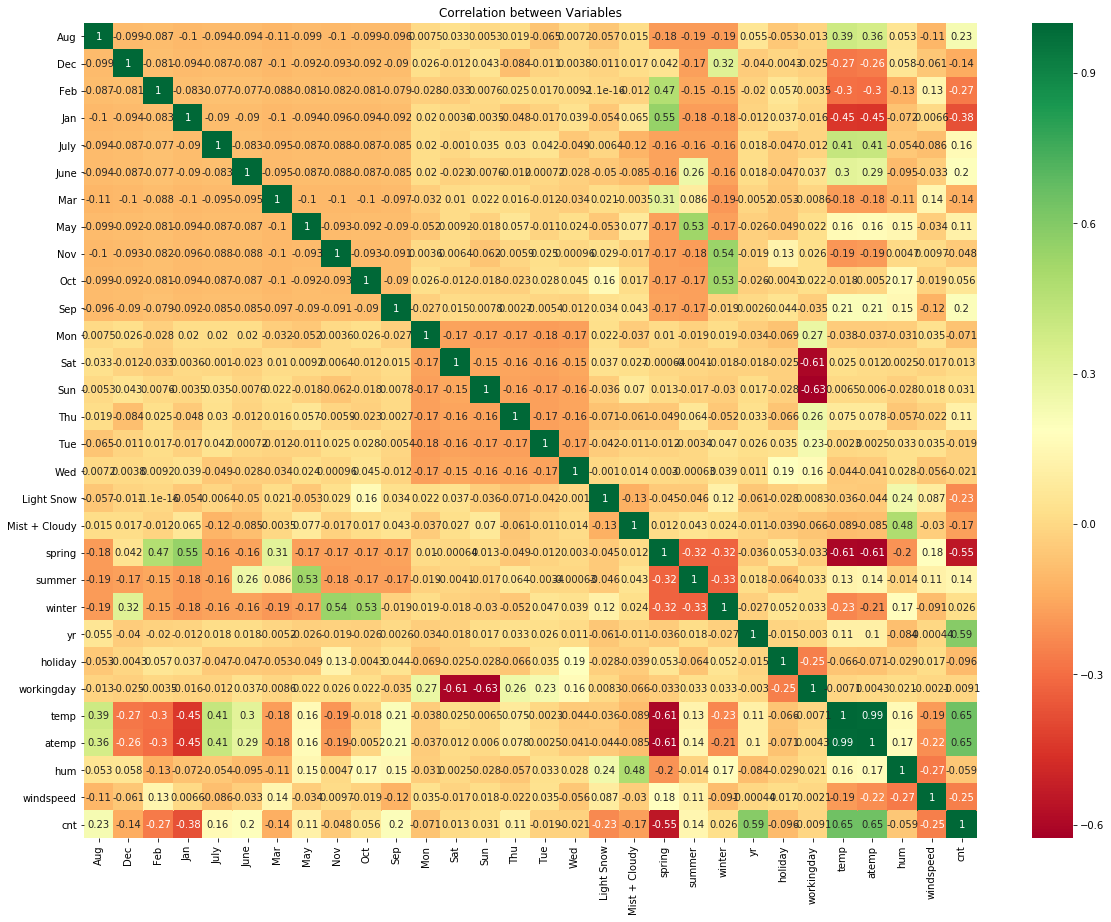

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(boombike_train.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

We see temp and atemp have highly correlated
From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August,june, September months we can see the counts are little high.

In [30]:
#Divide the data into X and y
y_train = boombike_train.pop('cnt')
X_train = boombike_train

# RFE

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [32]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [33]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday', 'atemp'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.15e-189
Time:                        16:49:30   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

## VIF 

In [35]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [36]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,yr,2.09
3,Nov,1.85
1,Jan,1.75


Dec is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [37]:
#Drop December
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

In [38]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.41e-189
Time:                        16:49:30   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [39]:
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,hum,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,yr,2.09
0,Jan,1.67
2,Nov,1.60


January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [40]:
#Drop January
X_train_new2 = X_train_lm1.drop(["Jan"], axis = 1)

In [41]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.94e-189
Time:                        16:49:30   Log-Likelihood:                 510.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2910      0.035      8.364

In [42]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,hum,28.10
10,temp,16.12
12,windspeed,4.71
5,spring,4.04
7,winter,3.75
6,summer,2.80
4,Mist + Cloudy,2.29
8,yr,2.08
1,Nov,1.60
0,July,1.58


'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [43]:
#Drop humidity
X_train_new3 = X_train_lm2.drop(["hum"], axis = 1)

In [44]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.19e-186
Time:                        16:49:31   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     497   BIC:                            -917.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.030      6.839

In [45]:
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,temp,5.11
11,windspeed,4.65
7,winter,2.28
6,summer,2.23
5,spring,2.09
8,yr,2.07
1,Nov,1.60
0,July,1.58
4,Mist + Cloudy,1.55
2,Sep,1.35


Nov variable seems to be insignificant, by looking at p value and low VIF. We can drop it

In [46]:
X_train_new4=X_train_lm3.drop(['Nov'],axis=1)
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.06e-187
Time:                        16:49:31   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [47]:
X_train_lm4=X_train_lm4.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,yr,2.07
6,winter,1.78
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it

In [48]:
X_train_new5=X_train_lm4.drop(['windspeed'], axis=1)
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.71e-181
Time:                        16:49:31   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [49]:
X_train_lm5=X_train_lm5.drop(['const'],axis=1)
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,yr,2.06
5,summer,1.94
0,July,1.58
6,winter,1.57
3,Mist + Cloudy,1.55
4,spring,1.40
1,Sep,1.34
2,Light Snow,1.07
8,holiday,1.04


In [50]:
#try keeping windspeed and droping temp

In [51]:
X_train_new6=X_train_lm4.drop(['temp'], axis=1)
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.02e-149
Time:                        16:49:31   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5837      0.017     34.708

as r-squred value decresed and even p value increase so doesnt seen good model.

so lm5 seems to be good model droping dec,jan,humidity,windspeed and nov columns from rfe support columns


## Residual analysis


In [52]:
X_train_lm5=sm.add_constant(X_train_lm5)

In [53]:
X_train_lm5

,const,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,temp
576,1.0,1,0,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,0,0,1,0,0,1,0,0.245101
482,1.0,0,0,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,0,1,0,1,0,0,0,0.345824
580,1.0,0,0,0,0,0,0,0,1,0,0.914852
500,1.0,0,0,0,0,0,1,0,1,0,0.719639
479,1.0,0,0,0,0,0,1,0,1,0,0.520271
472,1.0,0,0,0,1,0,1,0,1,0,0.503656
455,1.0,0,0,0,1,0,1,0,1,0,0.456929


In [54]:
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

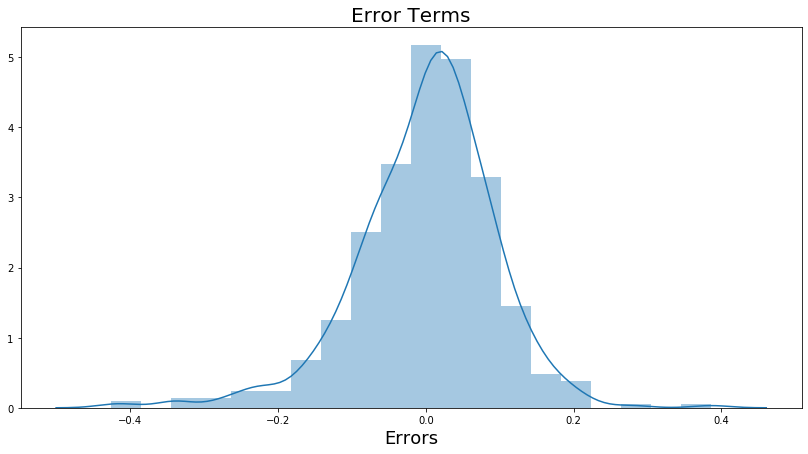

In [55]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

 scaling on the test sets

In [59]:
#Fit on data
boombike_test[num_vars] = scaler.transform(boombike_test[num_vars])
boombike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,...,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [61]:
#Dividing into X_test and y_test
y_test = boombike_test.pop('cnt')
X_test = boombike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,...,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,...,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,...,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474


In [62]:
X_train_new5.columns

Index(['July', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'yr', 'holiday', 'temp'],
      dtype='object')

In [63]:
X_test_new = X_test[X_train_new5.columns]

In [64]:
# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,temp
184,1.0,1,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,1,0,0,0,0.817246


In [65]:
y_pred = lm5.predict(X_test_new1)

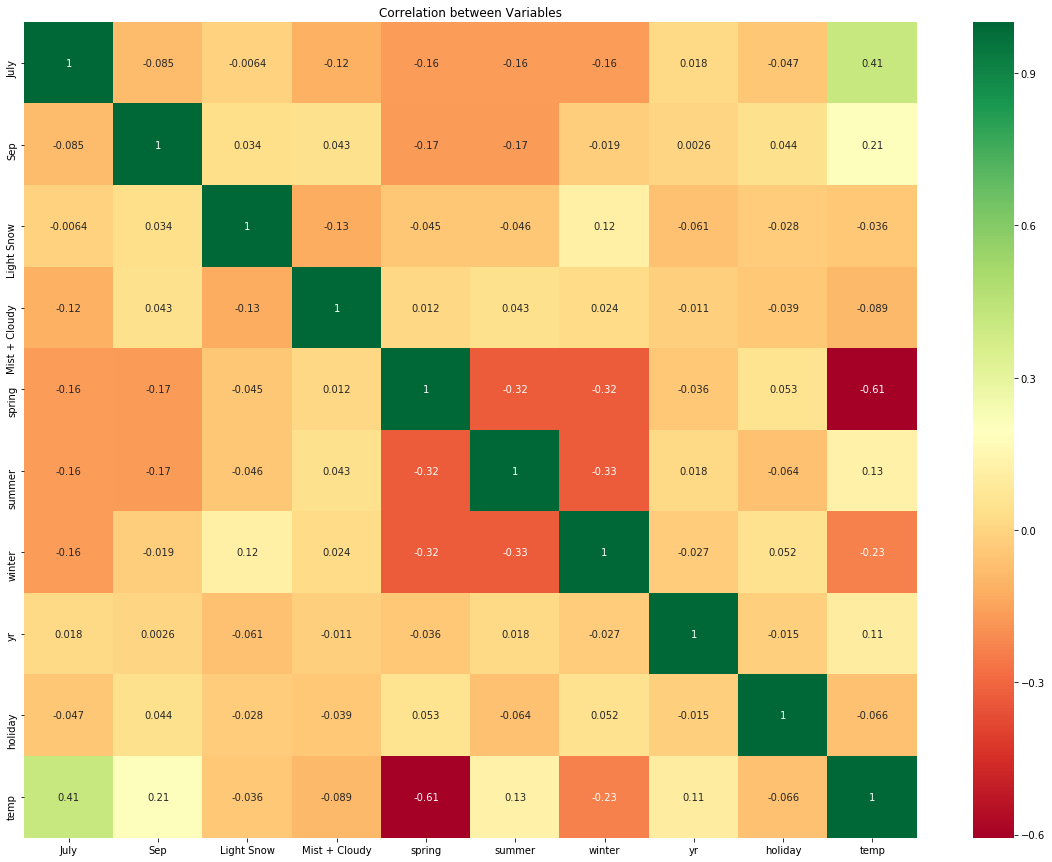

In [71]:
plt.figure(figsize=(20, 15))
sns.heatmap(boombike_train[X_train_new5.columns].corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

Text(0, 0.5, 'Residual')

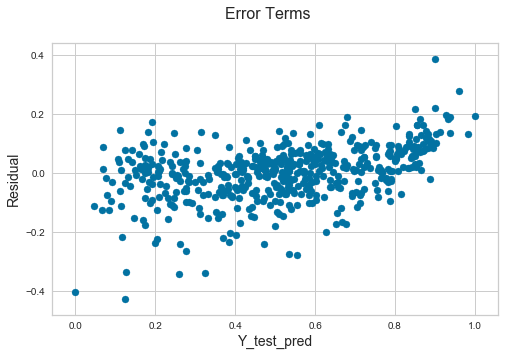

In [78]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,(y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

## Finding R-squared and Adjusted R-Squared for Test set


In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8092660294132242

In [67]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

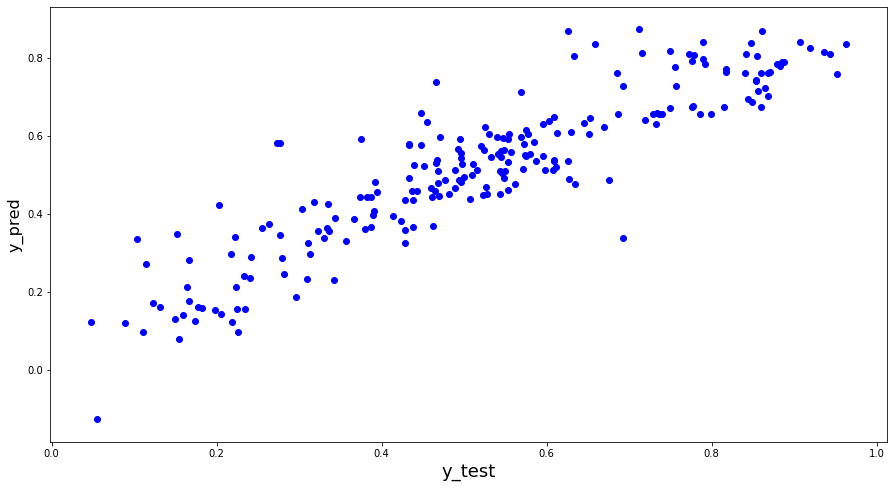

In [68]:
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)        

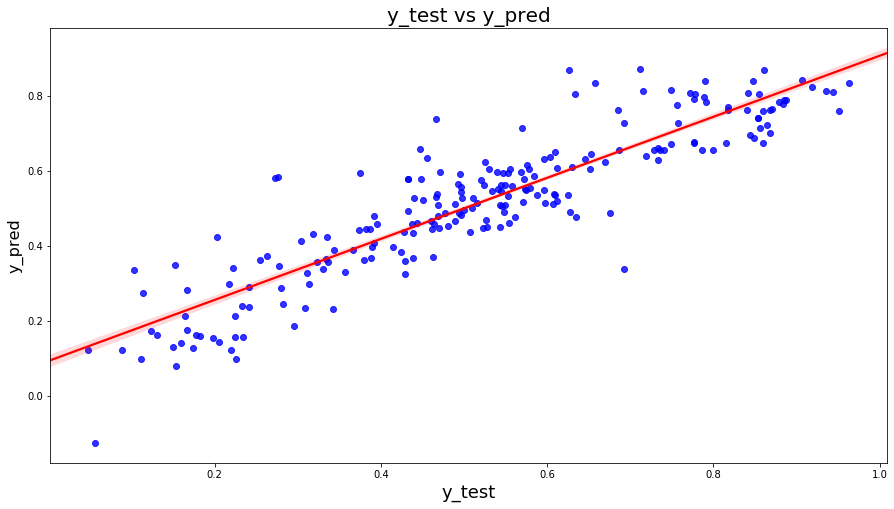

In [69]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# Final Equation :

We can see that the equation of our best fitted line is:

cnt=0.5029×temp-0.1003×holiday+0.2326×yr+0.0829×winter+0.0367×summer-0.0766 ×spring-0.0785×Mist + Cloudy-0.2989×Light Snow+0.0812×Sep-0.0523 ×July+0.1501 